This notebook is about the Monte-Carlo methods for policy evaluation (first-visit and every-visit), as described in Sutton's Reinforcement Learning book, 2nd edition, page 76.

In [21]:
import time

import matplotlib.pyplot as plt

from baserl.common import *
from baserl.monte_carlo import *

In [22]:
import time

import matplotlib.pyplot as plt

from baserl.common import *
from baserl.monte_carlo import *

In [23]:
%matplotlib inline

In [24]:
from baserl.grid_world import GridWorld
mdp = GridWorld()
episode_generator = ModelBasedEpisodeGenerator(mdp.states(), mdp.is_terminal, mdp.actions,
                                               mdp.transitions, 
                                               max_episode_len=100,
                                               fixed_start_state=None,
                                               with_exploring_starts=False,
                                               verbose=False)

In [25]:
episode = episode_generator.generate(make_random_policy(mdp.states(), mdp.actions))
print (len(episode), episode)

14 [((0, 3), 'R', -1), ((0, 3), 'D', -1), ((1, 3), 'D', -1), ((2, 3), 'R', -1), ((2, 3), 'U', -1), ((1, 3), 'L', -1), ((1, 2), 'L', -1), ((1, 1), 'R', -1), ((1, 2), 'U', -1), ((0, 2), 'R', -1), ((0, 3), 'L', -1), ((0, 2), 'L', -1), ((0, 1), 'U', -1), ((0, 1), 'L', -1)]


In [26]:
# Compare with ideal value function, plot RMSE vs #episodes
def compare_v_mse(ideal_v, actual_v):
    sum_diffs = 0.0
    num = 0
    for k, val in ideal_v.items():
        sum_diffs += (val - actual_v[k]) ** 2
        num += 1
    return sum_diffs / num

# We know the ideal Value Function for the Grid World - this is mentioned in the end of Figure 4.1, page 62 of
# Sutton's RL book. It can also be computed by running Iterative Policy Evaluation from chapter 4 for a longer time.
ideal_v_mat = [
[  0, -14, -20, -22], 
[-14, -18, -20, -20], 
[-20, -20, -18, -14], 
[-22, -20, -14,   0]
]
ideal_v = {}
for x in range(len(ideal_v_mat)):
    for y in range(len(ideal_v_mat[0])):
        ideal_v[(x, y)] = ideal_v_mat[x][y]

In [27]:
# First-visit
policy = make_random_policy(mdp.states(), mdp.actions)
start_time = time.time()
v_history = []
v = monte_carlo_policy_evaluation(every_visit=False,
                                  policy=policy,
                                  gamma=mdp.gamma(),
                                  episode_generator=episode_generator,
                                  num_episodes=100,
                                  verbose=False,
                                  v_history=v_history)
print(time.time() - start_time)

0.020024538040161133


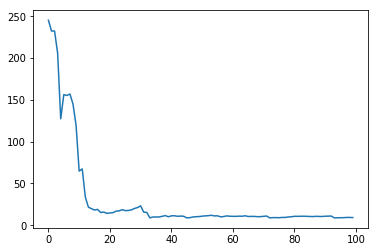

In [28]:
# Comparing the value function at each step of the First-Visit algorithm, with the ideal value function.
plt.plot([compare_v_mse(ideal_v, actual_v) for actual_v in v_history])

In [29]:
mdp.print_value(v)

  0.00  -9.04 -14.89 -19.41 
-15.71 -16.22 -18.46 -19.07 
-15.34 -14.69 -15.61 -14.47 
-19.44 -16.97 -10.89   0.00 


In [30]:
greedy_policy_from_v = make_greeedy_policy_from_v(v, mdp.states(), mdp.actions, mdp.transitions, mdp.gamma())
mdp.print_policy(greedy_policy_from_v)

  UL    L    L    L 
   U    U    U    D 
   R    L    D    D 
   U    R    R   DR 


In [31]:
# Every visit
policy = make_random_policy(mdp.states(), mdp.actions)
start_time = time.time()
v_history = []
v = monte_carlo_policy_evaluation(every_visit=True,
                                  policy=policy,
                                  gamma=mdp.gamma(),
                                  episode_generator=episode_generator,
                                  num_episodes=100,
                                  verbose=False,
                                  v_history=v_history)
print(time.time() - start_time)

0.03208279609680176


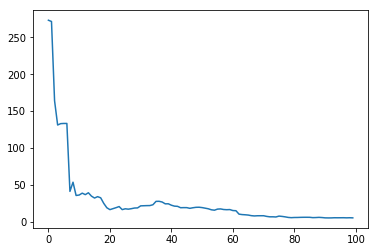

In [32]:
# Comparing the value function at each step of the Every-Visit algorithm, with the ideal value function.
plt.plot([compare_v_mse(ideal_v, actual_v) for actual_v in v_history])

In [33]:
mdp.print_value(v)

  0.00 -20.03 -21.47 -21.97 
-12.97 -21.62 -19.85 -21.70 
-18.27 -19.97 -17.63 -13.30 
-17.83 -19.34 -11.99   0.00 


In [34]:
greedy_policy_from_v = make_greeedy_policy_from_v(v, mdp.states(), mdp.actions, mdp.transitions, mdp.gamma())
mdp.print_policy(greedy_policy_from_v)

  UL    L    D    L 
   U    L    D    D 
   U    R    D    D 
  DL    R    R   DR 
